## <font color=blue>Contents<font/>

#########################################################################################################

1. **Jupyter setup <br>**
2. **Exploratory Data Analysis (part 2) <br>**
    * **Inspect Distributions**
    * **Remove Outlier Rows and Rerun Distribution Plots** <br><br>
3. **Hypothesis Testing**

#########################################################################################################

## <font color=blue>Jupyter Setup<font/>

###  Import required libraries:

In [13]:
import requests
import sqlite3
import pandas as pd
import numpy as np
import json
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 

In [2]:
pd.set_option('display.max_columns', 50)

In [4]:
df_reduced = pd.read_csv('Movies2018.csv', engine='python')

In [5]:
df_reduced.head()

,popularity,vote_count_x,vote_average_x,release_date,original_language_x,genre_ids,belongs_to_collection,budget,production_companies,production_countries,revenue,day_of_week,month,quarter,en_int_lang,collection
0,82.250,16683.0,8.3,2018-04-25,en,Adventure|Action|Science Fiction|,The Avengers Collection,300000000.0,Marvel Studios,US,2.046240e+09,2,4,2,en,Collection
1,38.895,14192.0,7.4,2018-02-13,en,Adventure|Fantasy|Action|Science Fiction|,Black Panther Collection,200000000.0,Marvel Studios,US,1.346739e+09,1,2,1,en,Collection
2,31.957,6878.0,6.5,2018-06-06,en,Adventure|Action|Science Fiction|,Jurassic Park Collection,170000000.0,Amblin Entertainment,US,1.303460e+09,2,6,2,en,Collection
3,30.431,7607.0,7.5,2018-06-14,en,Adventure|Animation|Action|Family|,The Incredibles Collection,200000000.0,Walt Disney Pictures,US,1.241891e+09,3,6,2,en,Collection
4,31.991,7849.0,6.8,2018-12-07,en,Adventure|Fantasy|Action|,Aquaman Collection,160000000.0,DC Comics,AU,1.143689e+09,4,12,4,en,Collection


In [6]:
df_reduced.columns

Index(['popularity', 'vote_count_x', 'vote_average_x', 'release_date',
       'original_language_x', 'genre_ids', 'belongs_to_collection', 'budget',
       'production_companies', 'production_countries', 'revenue',
       'day_of_week', 'month', 'quarter', 'en_int_lang', 'collection'],
      dtype='object')

In [7]:
categoricals = ['original_language_x', 'genre_ids', 'belongs_to_collection',
                'production_companies', 'production_countries', 'day_of_week', 
                'month', 'quarter', 'en_int_lang', 'collection']
len(categoricals)

10

### check outliers for continuous variables

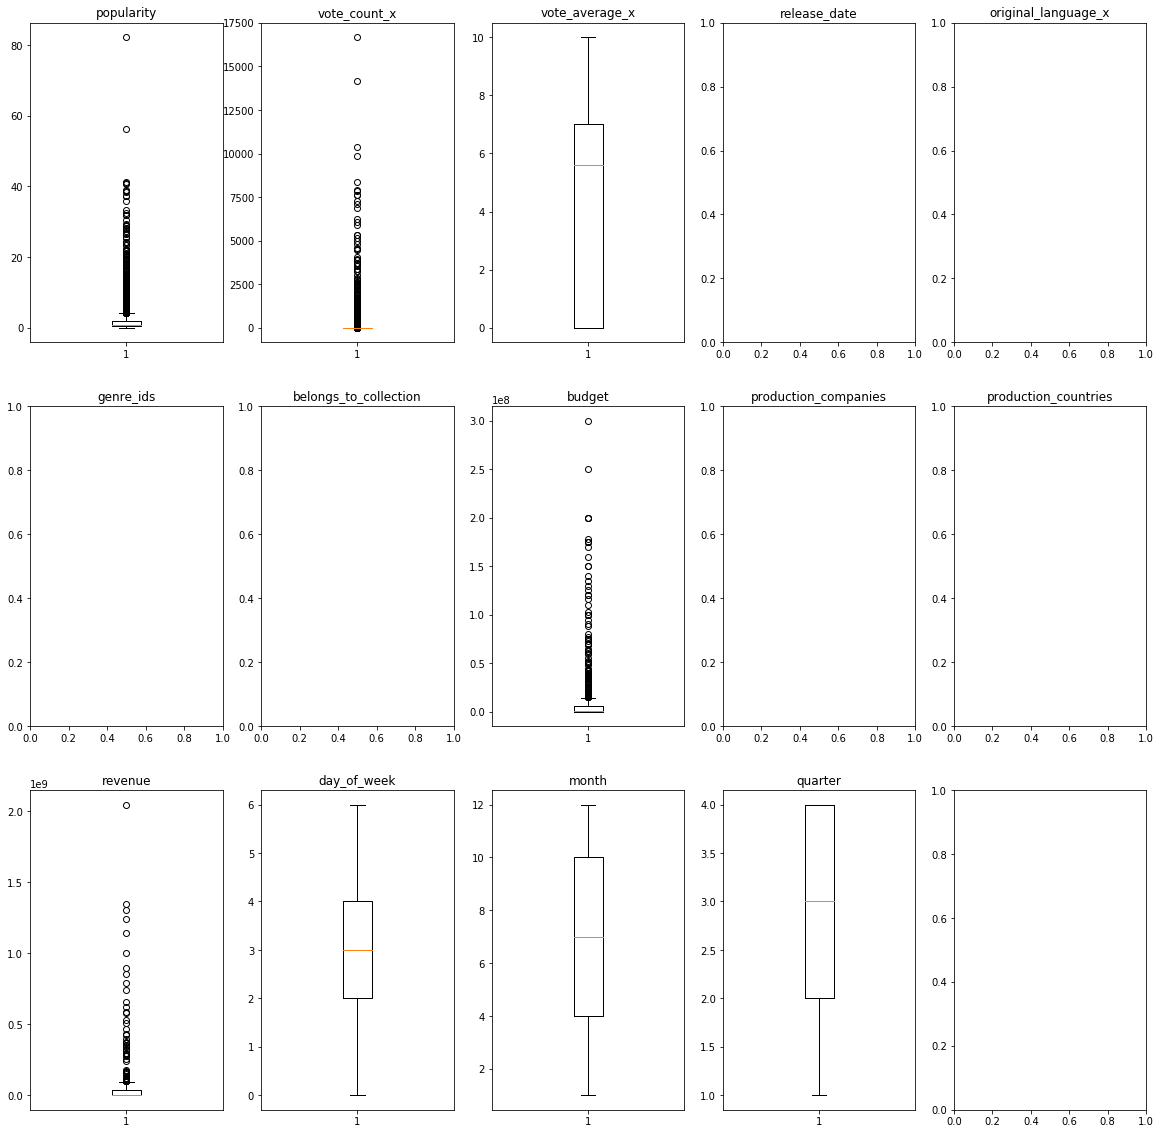

In [8]:
fig2, axes2 = plt.subplots(3, 5, figsize = (20,20))
axes2.shape

for n in range(1,15):
    
    i = df_reduced.dtypes.index[n-1]
    
    row = (n-1)//5
    col = (n-1)%5
    
    if str(i) in ['budget', 'revenue']:
        ax = axes2[row][col]
        ax.boxplot(df_reduced[str(i)].loc[df_reduced[str(i)] > 0])
        ax.set_title('{}'.format(i))
        
    elif str(type(df_reduced[str(i)][0])) in ["<class 'numpy.float64'>", "<class 'numpy.int64'>"]:
        ax = axes2[row][col]
        ax.boxplot(df_reduced[str(i)])
        ax.set_title('{}'.format(i))
    else:   
        ax = axes2[row][col]
        ax.set_title('{}'.format(i))
        continue

###   Inspect Distributions

In [ ]:
df_vote_average = df_reduced.loc[df_reduced['vote_count_x'] >= 30] 

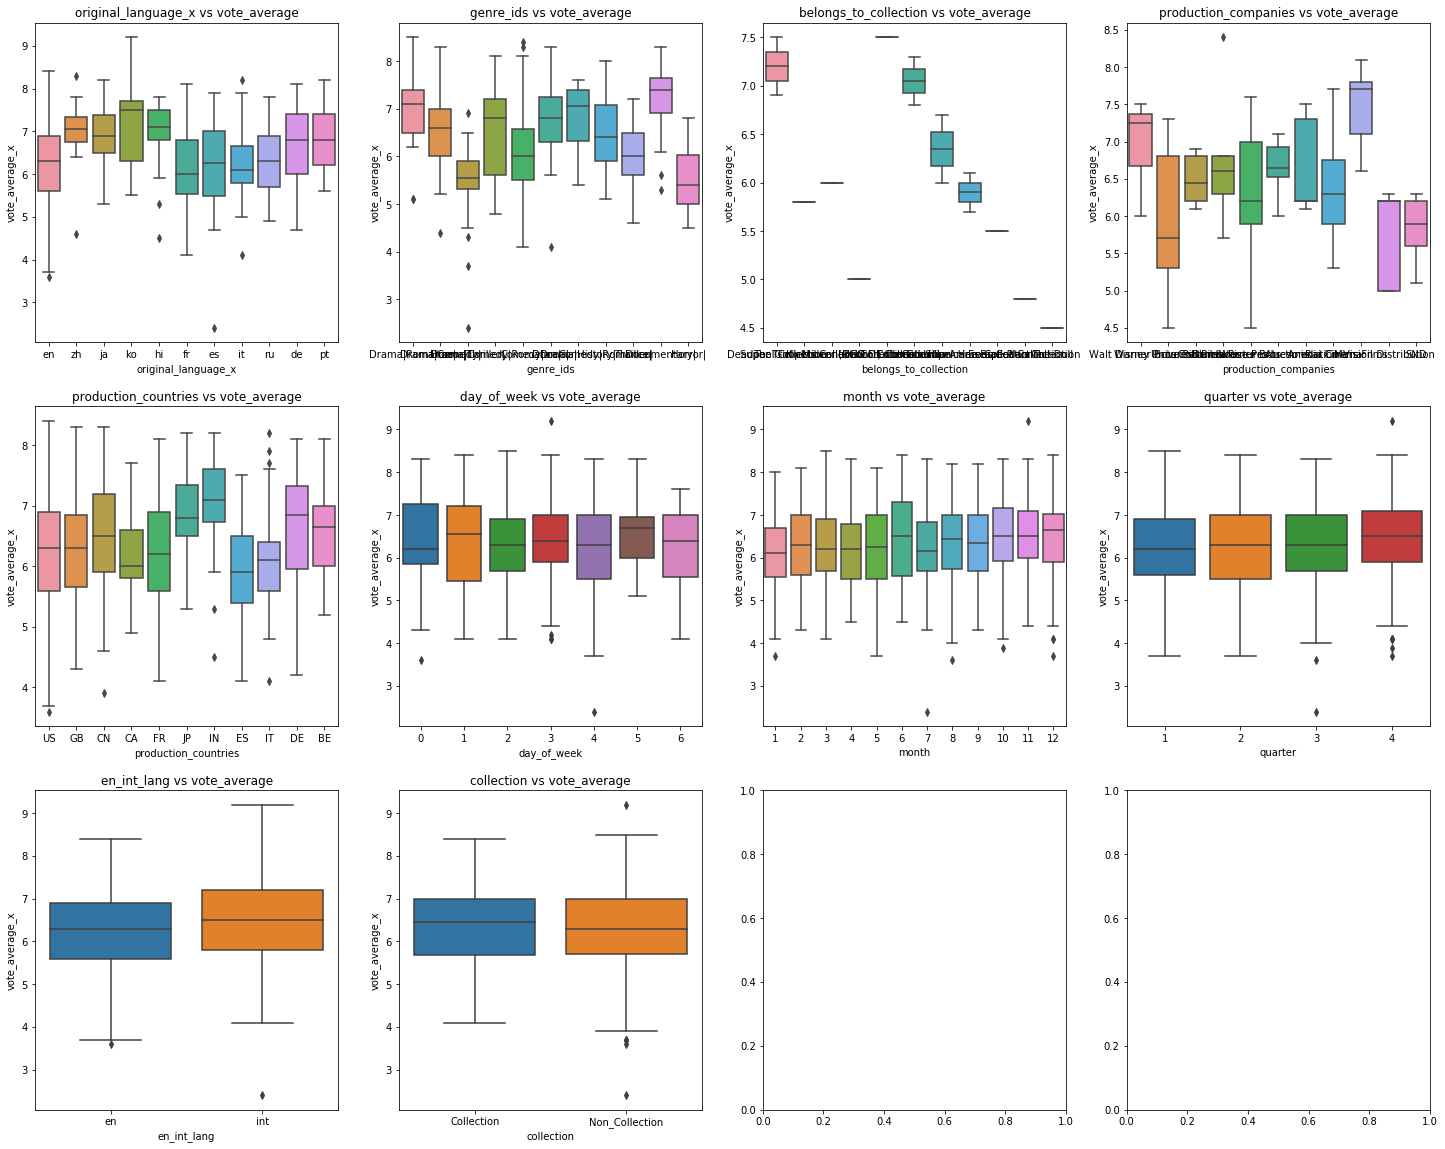

In [10]:
fig3, axes3 = plt.subplots(3, 4, figsize = (25,20))
axes3.shape

for n in range(1,11):
    
    i = categoricals[n-1]
    
    row = (n-1)//4
    col = (n-1)%4
    
    if str(type(df_vote_average[str(i)][0])) in ["<class 'numpy.float64'>", "<class 'numpy.int64'>"]:
        
        if (len(df_vote_average[str(i)].unique()) > 12):
            
            ax = axes3[row][col]
            ax.scatter(df_vote_average[str(i)], df_vote_average['vote_average_x'])
            ax.set_title('{}'.format(i) + ' vs vote_average')
            
        
        else:
            ax = axes3[row][col]
            sns.boxplot(str(i), 'vote_average_x', data=df_vote_average, ax=ax)
            ax.set_title('{}'.format(i) + ' vs vote_average')
    
    elif (len(df_vote_average[str(i)].unique()) > 12):
        
        top10 = list(df_vote_average[str(i)].loc[df_vote_average[str(i)] != 'na'].value_counts()[0:11].index)
        
        top10_df = df_vote_average[df_vote_average[str(i)].isin(top10)]
        
        ax = axes3[row][col]
        sns.boxplot(str(i), 'vote_average_x', data=top10_df, ax=ax)
        ax.set_title('{}'.format(i) + ' vs vote_average') 
            
        
    else:
            ax = axes3[row][col]
            sns.boxplot(str(i), 'vote_average_x', data=df_vote_average, ax=ax)
            ax.set_title('{}'.format(i) + ' vs vote_average') 

Categories of initial interest are: en_int_lang, genre_ids, quarter and month

In [11]:
categories_of_further_interest = ['en_int_lang', 'genre_ids', 'quarter', 'month']

en_int_lang , en NormaltestResult(statistic=5.1460343744506245, pvalue=0.07630497137143663)
en_int_lang , int NormaltestResult(statistic=4.65542416075279, pvalue=0.09751860678391161)
genre_ids , Comedy| NormaltestResult(statistic=4.084045823354522, pvalue=0.12976594015140538)
genre_ids , Drama| NormaltestResult(statistic=4.870463577202151, pvalue=0.08757744524176653)
genre_ids , Drama|Comedy| NormaltestResult(statistic=0.6469928201872197, pvalue=0.7236145556262367)
genre_ids , Documentary| NormaltestResult(statistic=6.004884885099243, pvalue=0.04966561469584742)
genre_ids , Comedy|Romance| NormaltestResult(statistic=0.7204206321251148, pvalue=0.6975296089622154)
genre_ids , Horror|Thriller| NormaltestResult(statistic=16.66106272647722, pvalue=0.00024104392896078907)
genre_ids , Thriller| NormaltestResult(statistic=0.2645620800012429, pvalue=0.8760947428105613)


/Users/flatiron/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))
/Users/flatiron/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


genre_ids , Drama|Romance| NormaltestResult(statistic=2.393955285952264, pvalue=0.30210590539171966)
genre_ids , Drama|Comedy|Romance| NormaltestResult(statistic=2.6414427328440597, pvalue=0.26694266901669744)
genre_ids , Horror| NormaltestResult(statistic=0.9254467621670106, pvalue=0.6295667584983782)
genre_ids , Drama|History| NormaltestResult(statistic=1.4784916463421958, pvalue=0.47747387950205233)


/Users/flatiron/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))
/Users/flatiron/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


quarter , 3 NormaltestResult(statistic=14.68585336885792, pvalue=0.0006471537318962803)
quarter , 4 NormaltestResult(statistic=3.241022360100775, pvalue=0.19779756306820453)
quarter , 2 NormaltestResult(statistic=5.675377698412538, pvalue=0.05856085264699919)
quarter , 1 NormaltestResult(statistic=1.7063681074288604, pvalue=0.4260561841579651)
month , 9 NormaltestResult(statistic=1.2768246718939904, pvalue=0.5281302521889473)
month , 10 NormaltestResult(statistic=0.7443690951196617, pvalue=0.6892270356191287)
month , 3 NormaltestResult(statistic=0.13498999700991937, pvalue=0.9347323956637773)
month , 8 NormaltestResult(statistic=2.9782261305360773, pvalue=0.2255726350465467)
month , 5 NormaltestResult(statistic=2.6770100060289335, pvalue=0.26223741982603005)
month , 11 NormaltestResult(statistic=1.1305603228864487, pvalue=0.5682009364618882)
month , 4 NormaltestResult(statistic=0.5940917958354415, pvalue=0.7430099089716409)
month , 6 NormaltestResult(statistic=12.181366347063962, pvalu

/Users/flatiron/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


month , 1 NormaltestResult(statistic=0.7076159948888628, pvalue=0.7020097420809477)
month , 12 NormaltestResult(statistic=5.027242017502316, pvalue=0.08097449837548487)
month , 7 NormaltestResult(statistic=15.990968298565274, pvalue=0.0003369809527352625)


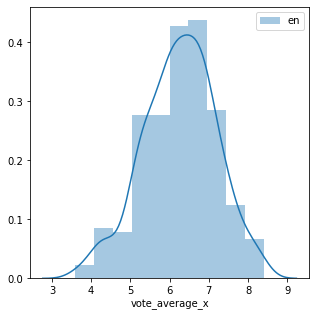

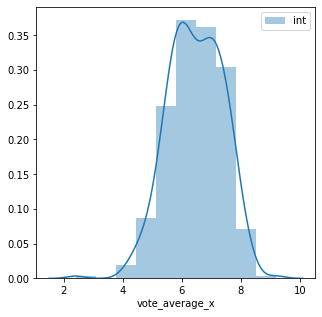

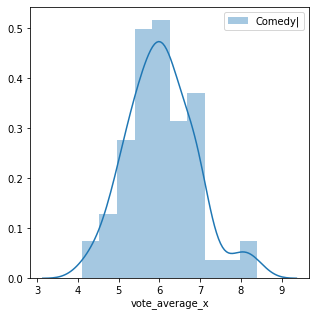

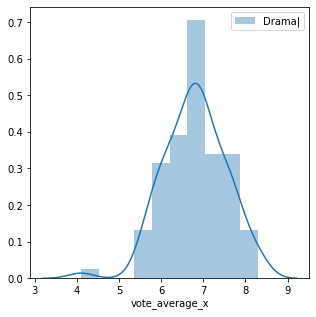

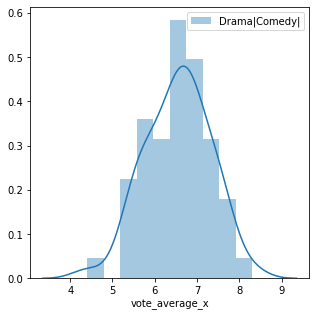

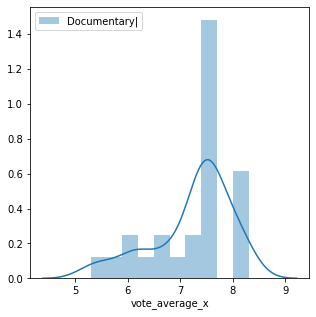

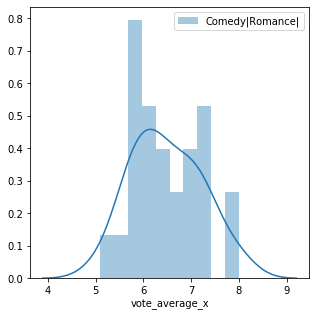

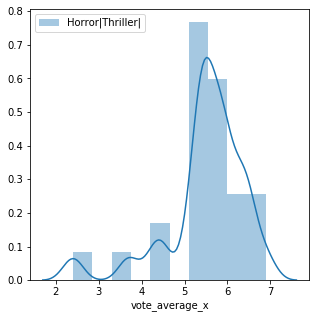

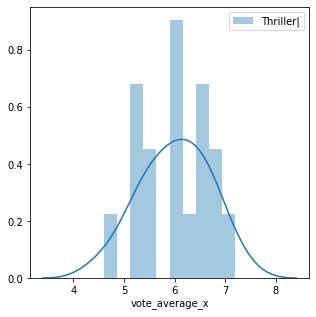

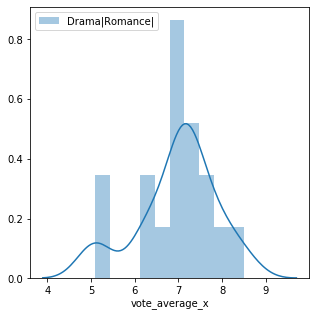

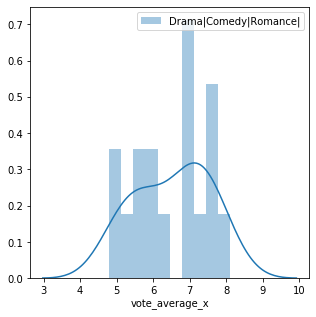

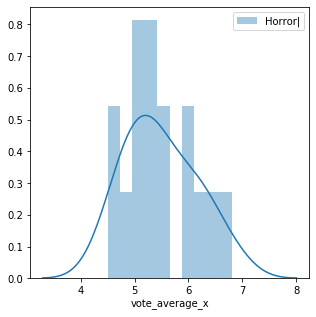

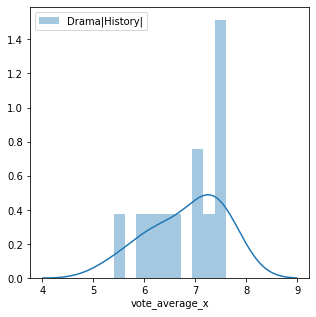

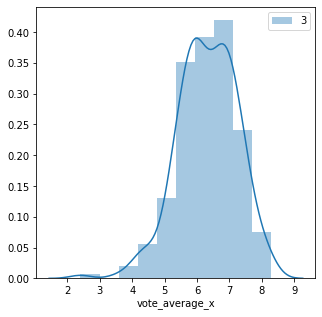

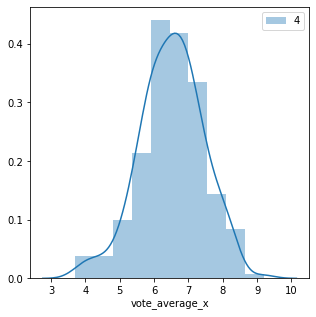

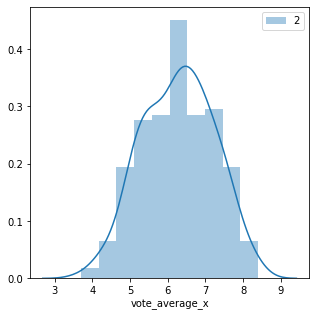

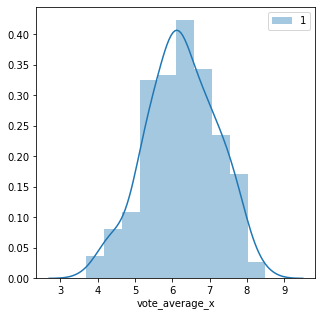

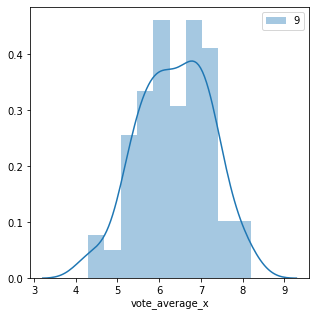

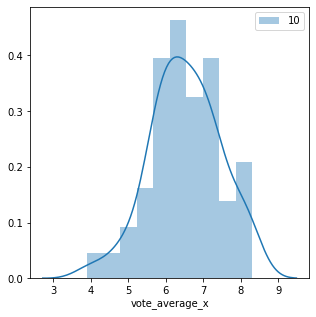

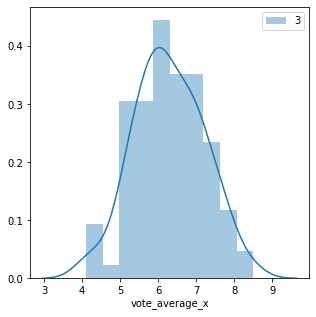

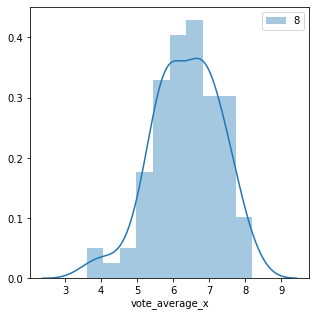

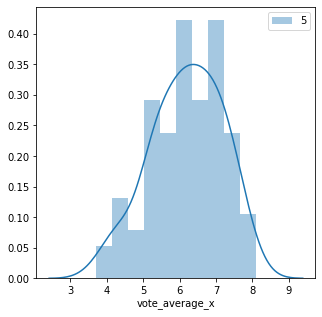

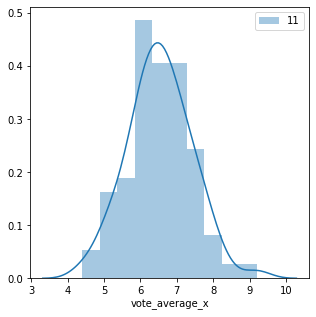

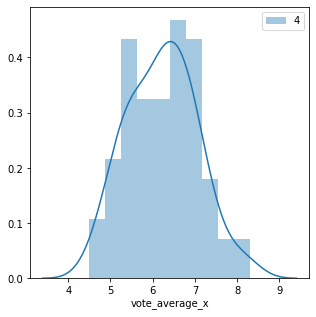

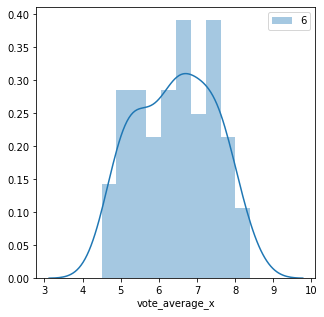

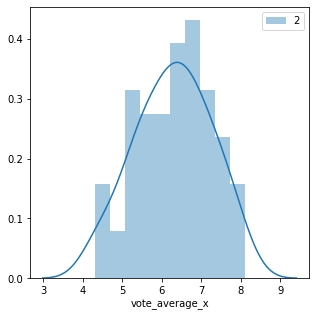

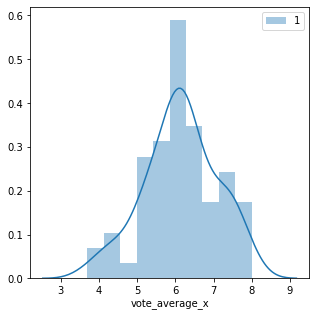

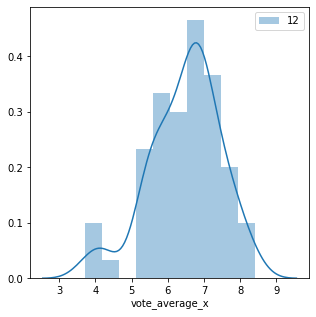

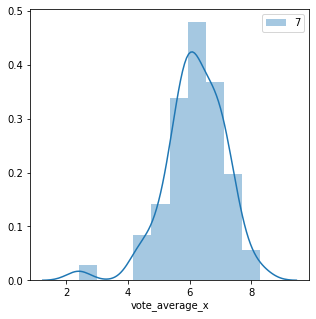

In [14]:
for cat in categories_of_further_interest:
    
    if cat != 'month':
    
        top10 = list(df_vote_average[cat].loc[df_vote_average[cat] != 'na'].value_counts()[0:11].index)
        
        top10_df = df_vote_average.loc[df_vote_average[cat].isin(top10)]

        exec(f'{cat} = top10_df.copy()')
    else:
        
        top10 = list(df_vote_average[cat].loc[df_vote_average[cat] != 'na'].value_counts()[0:13].index)
        
        top10_df = df_vote_average.loc[df_vote_average[cat].isin(top10)]

        exec(f'{cat} = top10_df.copy()')
        
    for i in top10:    
        print(cat, ',', i, stats.normaltest(list(top10_df[top10_df[cat] == i]['vote_average_x'])))
        
        fig = plt.figure(figsize = (5, 5))
        sns.distplot(top10_df[top10_df[cat] == i]['vote_average_x'], bins = 10, label=i)
        plt.legend()

Many of the categories of interests are normally distributed but some are not but close to being normal except for some skewness. So will remove extreme outliers from each category in an attempt to reduce skewness and make more normal.

In [15]:
for cat in categories_of_further_interest:
    
    if cat != 'month':
    
        top10 = list(df_vote_average[cat].loc[df_vote_average[cat] != 'na'].value_counts()[0:11].index)
        
        top10_df = df_vote_average.loc[df_vote_average[cat].isin(top10)]


    else:
        
        top10 = list(df_vote_average[cat].loc[df_vote_average[cat] != 'na'].value_counts()[0:13].index)
        
        top10_df = df_vote_average.loc[df_vote_average[cat].isin(top10)]

        
        
    exec(f"{cat}[str(cat) +  '_outlier_flag'] = 0")
    for i in top10:
    
        exec(f"data_mean, data_std = np.mean({cat}.loc[{cat}[cat] == i]['vote_average_x']), np.std({cat}.loc[{cat}[cat] == i]['vote_average_x'])")   
        cut_off = data_std * 3
        upper, lower = data_mean + cut_off, data_mean - cut_off
    
        exec(f"{cat}.loc[{cat}[cat] == i, (str(cat) +  '_outlier_flag')] = (({cat}.loc[{cat}[cat] == i]['vote_average_x'] >= upper) | ({cat}.loc[{cat}[cat] == i]['vote_average_x'] <= lower))")


en_int_lang , en NormaltestResult(statistic=5.1460343744506245, pvalue=0.07630497137143663)
en_int_lang , int NormaltestResult(statistic=7.580190847881082, pvalue=0.022593445792625778)
genre_ids , Comedy| NormaltestResult(statistic=4.084045823354522, pvalue=0.12976594015140538)
genre_ids , Drama| NormaltestResult(statistic=2.3902320093393423, pvalue=0.3026688411466072)
genre_ids , Drama|Comedy| NormaltestResult(statistic=0.6469928201872197, pvalue=0.7236145556262367)
genre_ids , Documentary| NormaltestResult(statistic=6.004884885099243, pvalue=0.04966561469584742)
genre_ids , Comedy|Romance| NormaltestResult(statistic=0.7204206321251148, pvalue=0.6975296089622154)
genre_ids , Horror|Thriller| NormaltestResult(statistic=4.778953654248388, pvalue=0.09167763458488924)
genre_ids , Thriller| NormaltestResult(statistic=0.2645620800012429, pvalue=0.8760947428105613)
genre_ids , Drama|Romance| NormaltestResult(statistic=2.393955285952264, pvalue=0.30210590539171966)
genre_ids , Drama|Comedy|Ro

/Users/flatiron/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


month , 5 NormaltestResult(statistic=2.6770100060289335, pvalue=0.26223741982603005)
month , 11 NormaltestResult(statistic=0.35767680444077565, pvalue=0.8362410231714555)
month , 4 NormaltestResult(statistic=0.5940917958354415, pvalue=0.7430099089716409)
month , 6 NormaltestResult(statistic=12.181366347063962, pvalue=0.002263861775946942)
month , 2 NormaltestResult(statistic=2.053429621414668, pvalue=0.35818172461800357)
month , 1 NormaltestResult(statistic=0.7076159948888628, pvalue=0.7020097420809477)
month , 12 NormaltestResult(statistic=5.027242017502316, pvalue=0.08097449837548487)
month , 7 NormaltestResult(statistic=0.15063047463065396, pvalue=0.9274510730548199)


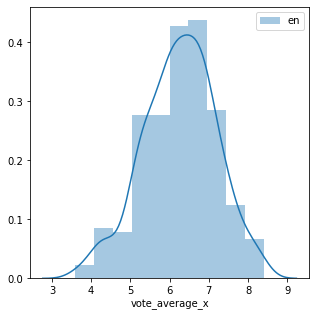

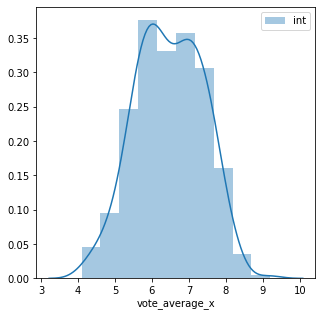

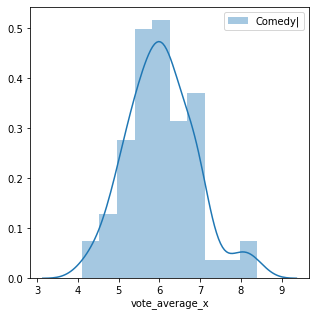

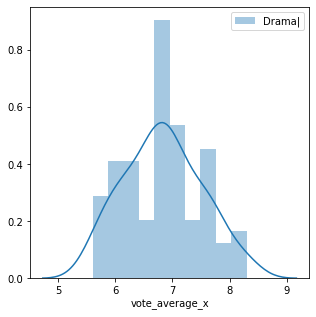

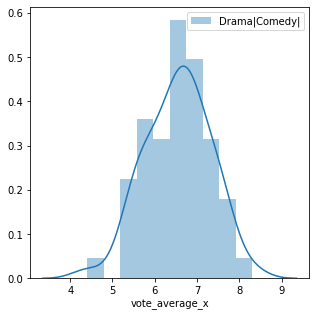

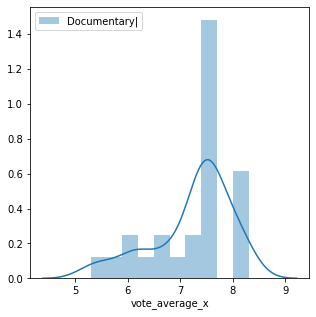

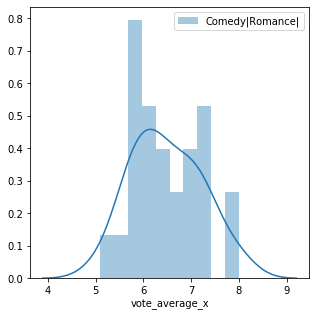

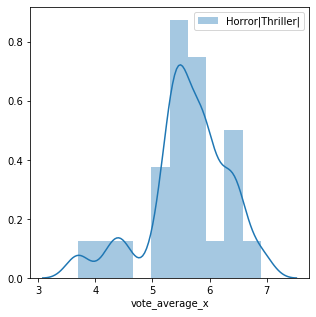

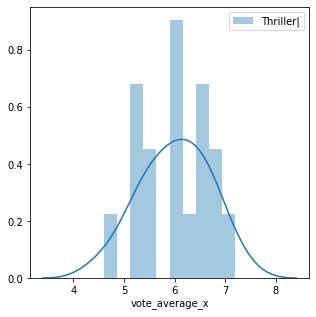

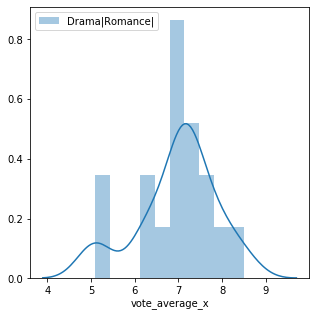

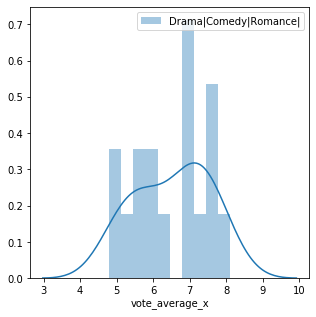

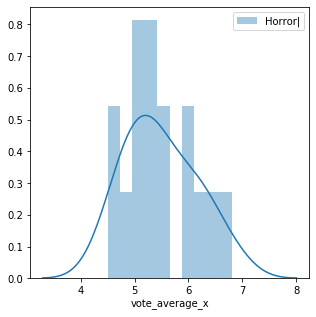

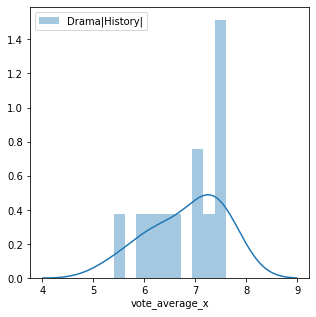

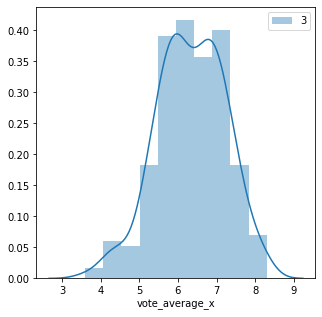

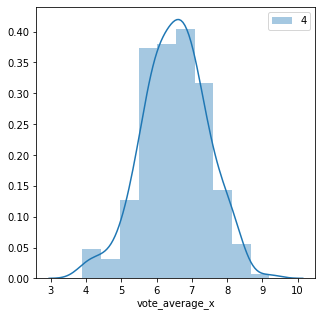

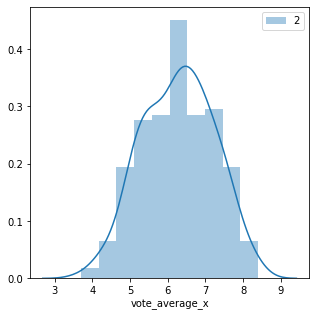

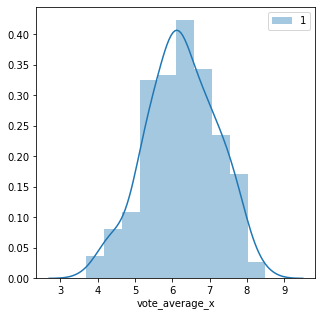

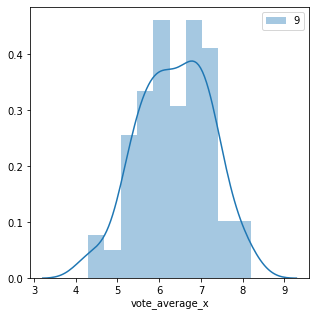

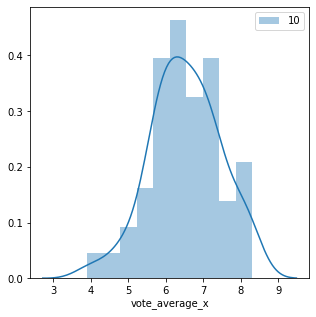

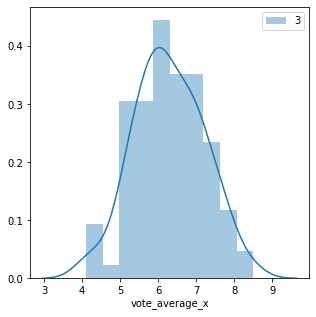

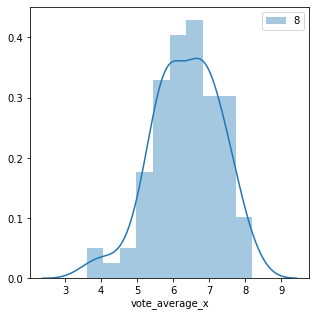

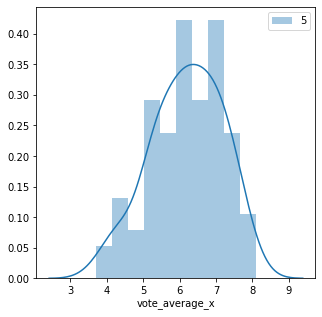

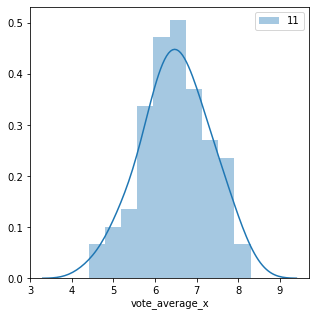

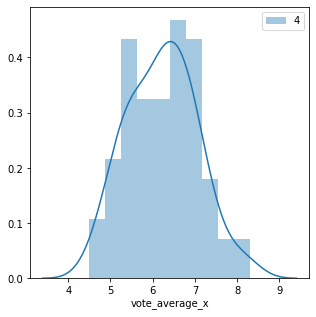

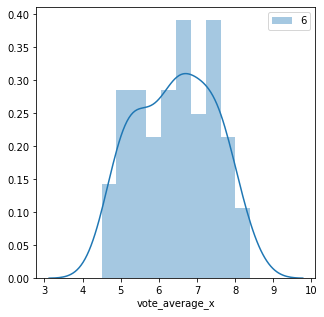

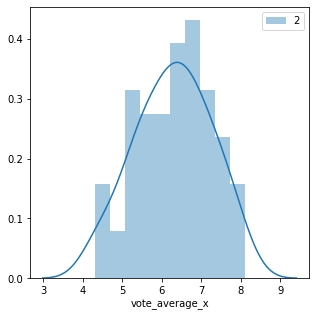

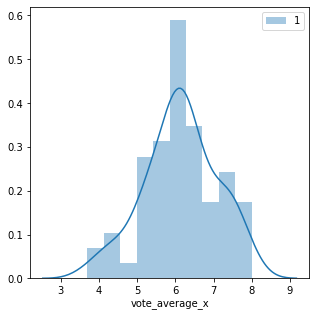

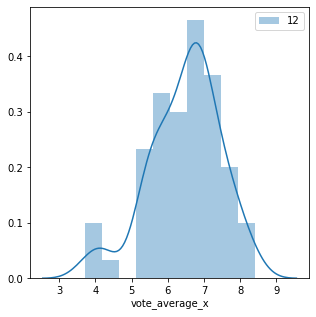

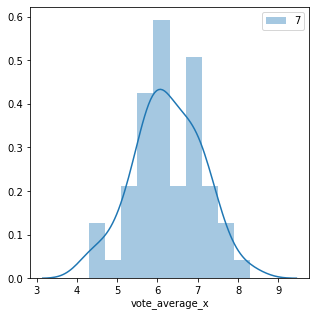

In [17]:
for cat in categories_of_further_interest:
    
    if cat != 'month':
    
        top10 = list(df_vote_average[cat].loc[df_vote_average[cat] != 'na'].value_counts()[0:11].index)
        
        top10_df = df_vote_average.loc[df_vote_average[cat].isin(top10)]


    else:
        
        top10 = list(df_vote_average[cat].loc[df_vote_average[cat] != 'na'].value_counts()[0:13].index)
        
        top10_df = df_vote_average.loc[df_vote_average[cat].isin(top10)]
    
    for i in top10:    
        exec(f"print(cat, ',', i, stats.normaltest(list({cat}[({cat}[cat + '_outlier_flag'] == False) & ({cat}[cat] == i)]['vote_average_x'])))")
        
        fig = plt.figure(figsize = (5, 5))
        exec(f"sns.distplot({cat}[({cat}[cat + '_outlier_flag'] == False) & ({cat}[cat] == i)]['vote_average_x'], bins = 10, label=i)")
        plt.legend()

### `en_int_lang`

In [39]:
en_int_lang_no_outliers = en_int_lang.loc[en_int_lang['en_int_lang_outlier_flag'] == False, ['en_int_lang', 'vote_average_x']]

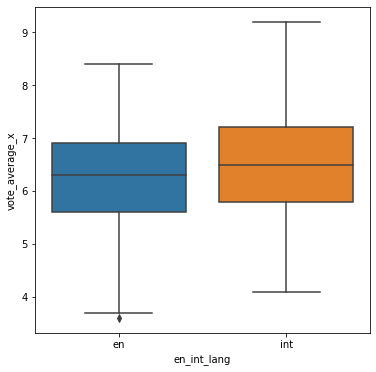

In [43]:
fig = plt.subplots(figsize = (6,6))
sns.boxplot(x='en_int_lang', y='vote_average_x', data=en_int_lang_no_outliers);

#### Null Hypothesis (H0):                Mean Rating of en = Mean Rating of int
#### Alternative Hypothesis (H1):    Mean Rating  of en ≠ Mean Rating of int

In [18]:
en_language = en_int_lang[(en_int_lang['en_int_lang'] == 'en') & (en_int_lang['en_int_lang_outlier_flag'] == False)]['vote_average_x']
int_language = en_int_lang[(en_int_lang['en_int_lang'] == 'int') & (en_int_lang['en_int_lang_outlier_flag'] == False)]['vote_average_x']

In [36]:
def welch_t(a, b):
    
    """ Calculate Welch's t-statistic for two samples. """
    
    
    mean_a = a.mean()
    mean_b = b.mean()
    
    SE_a = (np.std(a, ddof = 1)**2)/len(a)
    SE_b = (np.std(b, ddof = 1)**2)/len(b)
    
    t = (mean_a - mean_b)/np.sqrt(SE_a + SE_b)
    
    return t



def welch_df(a, b):
    
    """ Calculate the effective degrees of freedom for two samples. """
    
    df_a = len(a) - 1
    df_b = len(b) - 1
    
    SE_a = (np.std(a, ddof = 1)**2)/len(a)
    SE_b = (np.std(b, ddof = 1)**2)/len(b)
    
    SE_4_a = (np.std(a, ddof = 1)**4)/((len(a)**2)*df_a)
    SE_4_b = (np.std(b, ddof = 1)**4)/((len(b)**2)*df_b)
    
    df = ((SE_a + SE_b)**2)/(SE_4_a + SE_4_b)
    
    return df

def p_value(a, b, two_sided=False):
    
    
    t = welch_t(a, b)
    df = welch_df(a, b)
    
    if two_sided == False:
        p = stats.t.cdf(t, df)
    else:
        p = stats.t.cdf(t, df)*2
    
    return p

In [37]:
print('difference in means: ', en_language.mean() - int_language.mean())
print('en_language sample size: ', len(en_language))
print('int_language sample size: ', len(int_language))

difference in means:  -0.21376222099243147
en_language sample size:  556
int_language sample size:  390


The samples are unevenly sized and the sample sizes are very large. For this reason a 2-tailed welch's t-test was performed to test the Alternative Hypothesis.

In [22]:
t = welch_t(en_language, int_language)
df = welch_df(en_language, int_language)
print(t, df)

-3.5230219498939657 847.0933144387717


In [26]:
p_value(en_language, int_language, two_sided=True)

0.00044948397132033057

In [32]:
def Cohen_d(group1, group2):

    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    # Calculate the pooled threshold as shown earlier
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)
    
    return d

In [105]:
c_d = Cohen_d(en_language, int_language)

In [106]:
print('effect size: ', c_d)

effect size:  -0.23192738184711365


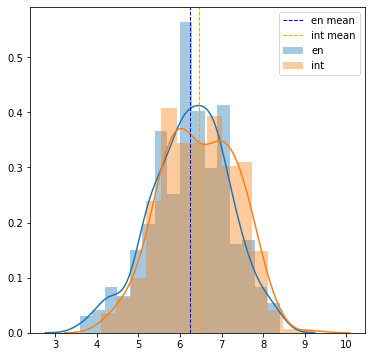

In [107]:
fig = plt.subplots(figsize = (6,6))
sns.distplot(list(en_language), label = 'en')
sns.distplot(list(int_language), label = 'int')
plt.axvline(en_language.mean(), color='blue', linestyle='--', lw=1,label='en mean')
plt.axvline(int_language.mean(), color='orange', linestyle='--', lw=1,label='int mean')
plt.legend();

In [108]:
from statsmodels.stats.power import TTestIndPower, TTestPower

In [111]:
power_analysis = TTestIndPower()
power_analysis.solve_power(effect_size=c_d, nobs1=390, alpha=.05, ratio = 556/390)

0.9391681564548459

so while we are able to reject the null hypothesis the very small effect size indicate that there is no meaningful difference in the average ratings for English language movies and non-English language movies.

### `genre_ids`

In [65]:
genre_ids.loc[genre_ids['genre_ids_outlier_flag'] == False]['genre_ids'].value_counts()

Comedy|                  126
Drama|                    90
Drama|Comedy|             57
Documentary|              27
Comedy|Romance|           26
Horror|Thriller|          25
Thriller|                 17
Drama|Romance|            17
Drama|Comedy|Romance|     17
Horror|                   16
Drama|History|            12
Name: genre_ids, dtype: int64

the top 3 genres based on the number of movies released are: Comedy, Drama and Drama|Comedy ('Dramadey')

In [67]:
genre_ids_no_outliers = genre_ids.loc[genre_ids['genre_ids_outlier_flag'] == False, ['genre_ids', 'vote_average_x']]

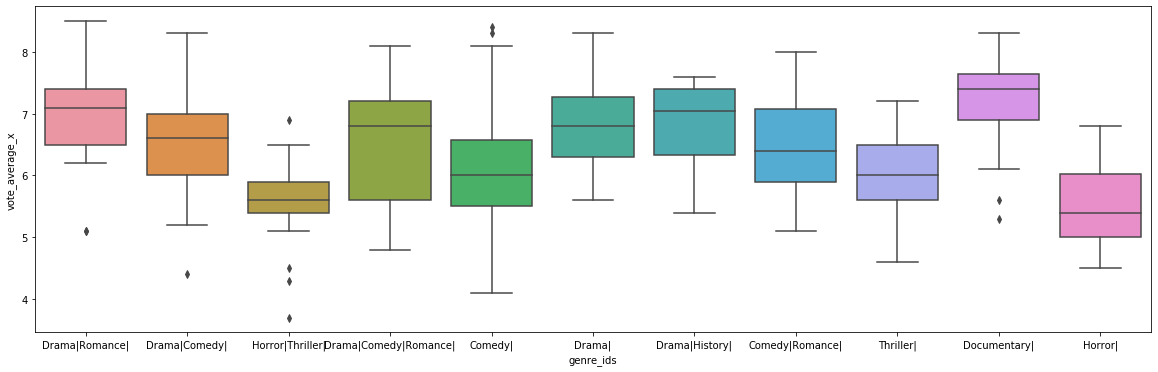

In [71]:
fig = plt.subplots(figsize = (20,6))
sns.boxplot(x='genre_ids', y='vote_average_x', data=genre_ids_no_outliers);

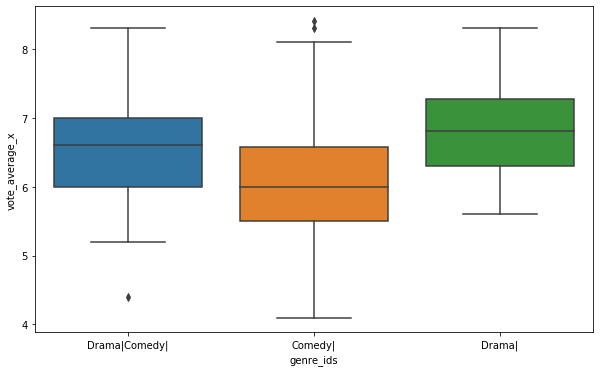

In [73]:
fig = plt.subplots(figsize = (10,6))
sns.boxplot(x='genre_ids', y='vote_average_x', data=genre_ids_no_outliers.loc[genre_ids_no_outliers['genre_ids'].isin(['Comedy|', 'Drama|', 'Drama|Comedy|'])]);

In [79]:
drama_comedy_genres = ['Comedy|', 'Drama|', 'Drama|Comedy|']
genre_table = genre_ids.loc[(genre_ids['genre_ids'].isin(drama_comedy_genres)) & (genre_ids['genre_ids_outlier_flag'] == False), ['genre_ids', 'vote_average_x']]
formula = 'vote_average_x ~ C(genre_ids)'
lm = ols(formula, genre_table).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)    

                  sum_sq     df          F        PR(>F)
C(genre_ids)   33.733384    2.0  28.512357  5.830832e-12
Residual      159.720462  270.0        NaN           NaN


In [90]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [91]:
tab = genre_table[genre_table['genre_ids'].isin(['Comedy|','Drama|','Drama|Comedy|'])]
mc = MultiComparison(tab['vote_average_x'], tab['genre_ids'])
mc_results = mc.tukeyhsd()
print(mc_results)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1     group2    meandiff p-adj  lower  upper  reject
----------------------------------------------------------
Comedy|        Drama|   0.7856  0.001 0.5354 1.0357   True
Comedy| Drama|Comedy|   0.4994  0.001 0.2101 0.7888   True
 Drama| Drama|Comedy|  -0.2861 0.0734 -0.593 0.0207  False
----------------------------------------------------------


null hypothesis between Comedy and Drama rejected <br>
null hypothesis between Comedy and Drama|Comedy rejected <br>
null hypothesis between Drama and Drama|Comedy **NOT** rejected

In [ ]:
comedy = list(genre_table.loc[genre_table['genre_ids'] == drama_comedy_genres[0]]['vote_average_x'])
drama = list(genre_table.loc[genre_table['genre_ids'] == drama_comedy_genres[1]]['vote_average_x'])
drama_comedy = list(genre_table.loc[genre_table['genre_ids'] == drama_comedy_genres[2]]['vote_average_x'])

In [112]:
print('difference in means: ', np.array(comedy).mean() - np.array(drama).mean())
print('comedy_language sample size: ', len(comedy))
print('drama_language sample size: ', len(drama))

difference in means:  -0.7855555555555567
comedy_language sample size:  126
drama_language sample size:  90


In [94]:
p_value(np.array(comedy), np.array(drama), two_sided=True)

7.278629181048362e-13

In [118]:
c_d = Cohen_d(np.array(comedy), np.array(drama))

In [119]:
print('effect size: ', c_d)

effect size:  -1.023992198839946


In [120]:
power_analysis = TTestIndPower()
power_analysis.solve_power(effect_size=c_d, nobs1=120, alpha=.05, ratio = 90/120)

1.0

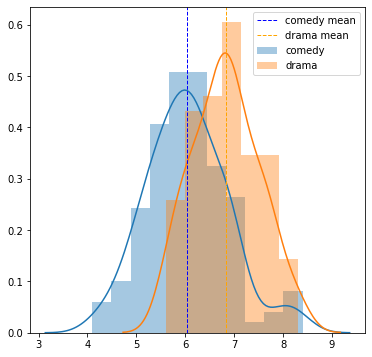

In [121]:
fig = plt.subplots(figsize = (6,6))
sns.distplot(comedy, label = 'comedy')
sns.distplot(drama, label = 'drama')
plt.axvline(np.array(comedy).mean(), color='blue', linestyle='--', lw=1,label='comedy mean')
plt.axvline(np.array(drama).mean(), color='orange', linestyle='--', lw=1,label='drama mean')
plt.legend();

In [122]:
p_value(np.array(comedy), np.array(drama_comedy), two_sided=True)

0.00011794521849202797

In [123]:
c_d = Cohen_d(np.array(comedy), np.array(drama_comedy))

In [124]:
print('effect size: ', c_d)

effect size:  -0.6187686444544191


In [125]:
power_analysis = TTestIndPower()
power_analysis.solve_power(effect_size=c_d, nobs1=120, alpha=.05, ratio = 90/120)

0.9929925119951566

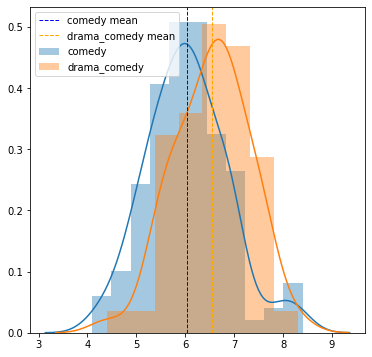

In [126]:
fig = plt.subplots(figsize = (6,6))
sns.distplot(comedy, label = 'comedy')
sns.distplot(drama_comedy, label = 'drama_comedy')
plt.axvline(np.array(comedy).mean(), color='blue', linestyle='--', lw=1,label='comedy mean')
plt.axvline(np.array(drama_comedy).mean(), color='orange', linestyle='--', lw=1,label='drama_comedy mean')
plt.legend();

Non Parametric - Kruskal - Wallis H test

In [81]:
from scipy.stats import kruskal

In [86]:
stat, p = kruskal(comedy, drama, drama_comedy)
print('Statistics=%.3f, p=%.9f' % (stat, p))

Statistics=49.855, p=0.000000000


In [88]:
import scikit_posthocs as sp
sp.posthoc_dunn([comedy, drama, drama_comedy], p_adjust = 'holm')

,1,2,3
1,-1.000000e+00,1.549592e-11,0.000209
2,1.549592e-11,-1.000000e+00,0.049080
3,2.091607e-04,4.908012e-02,-1.000000
